# Analysis of Airplane Crashes since 1908

## 1. Importing modules

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import pandas as pd #linear algebra
import seaborn as sns #visualization tool
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts  #data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
from collections import Counter
import os

print(os.listdir("../input/"))

['Airplane_Crashes_and_Fatalities_Since_1908.csv']


## 2. Loading the data

In [2]:
data = pd.read_csv("../input/Airplane_Crashes_and_Fatalities_Since_1908.csv")

See first five columns to ensure our data file read correctly

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## 3. Data Info and Manipulation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [5]:
data.isnull().any()

Date            False
Time             True
Location         True
Operator         True
Flight #         True
Route            True
Type             True
Registration     True
cn/In            True
Aboard           True
Fatalities       True
Ground           True
Summary          True
dtype: bool

As we can see from the outputs above, we have some NaN values. We will replace these values with 0 for the numeric values.

In [6]:
data['Fatalities'].fillna(0, inplace = True)
data['Aboard'].fillna(0, inplace = True)
data['Ground'].fillna(0, inplace = True)

Let's convert the 'Date' column to the appropriate format.

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.strftime("%d/%m/%Y")
data['Date'].head()

0    17/09/1908
1    12/07/1912
2    06/08/1913
3    09/09/1913
4    17/10/1913
Name: Date, dtype: object

For visualization, I create a new column called Year.

In [8]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Year'].head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

With data on number of fatalities and people aboard,I create a new variable with the number of people that survived the crash and call this variable 'Survived'.I also replace any NaN value with 0 on this column.

In [9]:
data['Survived'] = data['Aboard'] - data['Fatalities']
data['Survived'].fillna(0, inplace = True)

Now our dataframe looks like this.

In [10]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,06/08/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


## 4. Visualizations

In [11]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('tab20')

### 4.1 Airplane Crashes per Year 

First we summarise to get the count of accidents per year

In [12]:
total_crashes_year = data[['Year', 'Date']].groupby('Year').count()
total_crashes_year = total_crashes_year.reset_index()
total_crashes_year.columns = ['Year', 'Crashes']

Line plot with Seaborn.

Text(0,0.5,'number of crashes')

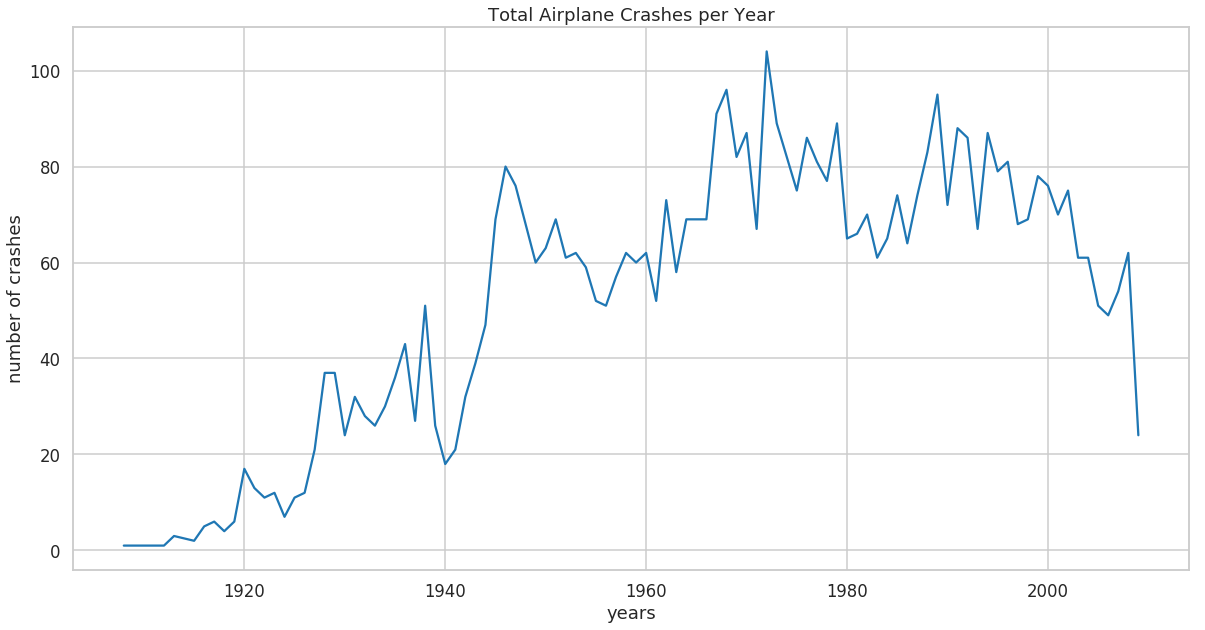

In [13]:
sns.lineplot(x = 'Year', y = 'Crashes', data = total_crashes_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('years')
plt.ylabel('number of crashes')

We see that after 40's, there is a significant increase in airplane crashes. The highest peaks are between 1960 and 2000.

### 4.2 Death Toll per Year

In [14]:
pcdeaths_year = data[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths_year.reset_index(inplace = True)

Text(0.5,0,'Years')

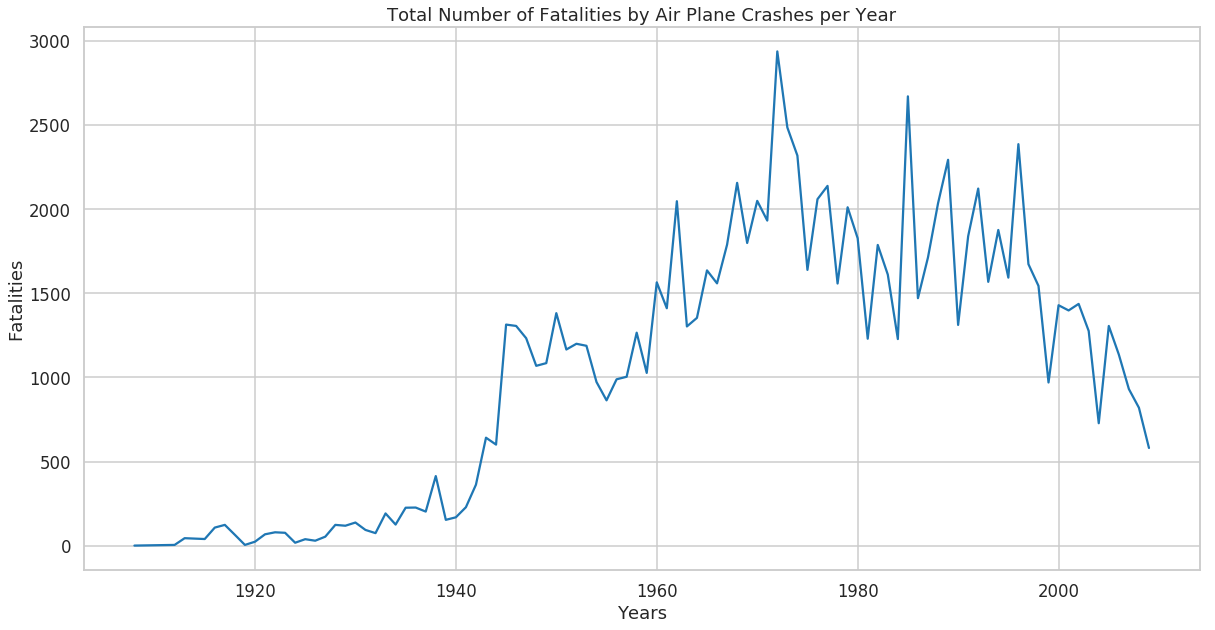

In [15]:
# Plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = pcdeaths_year)
plt.title('Total Number of Fatalities by Air Plane Crashes per Year')
plt.xlabel('Fatalities')
plt.xlabel('Years')

Here we can see the same pattern, the years that had the most accidents are also the ones with the most fatalities

### 4.3 People Aboard Airplanes per Year

In [16]:
# summarise
abrd_per_year = data[['Year', 'Aboard']].groupby('Year').sum()
abrd_per_year = abrd_per_year.reset_index()

Text(0,0.5,'Count')

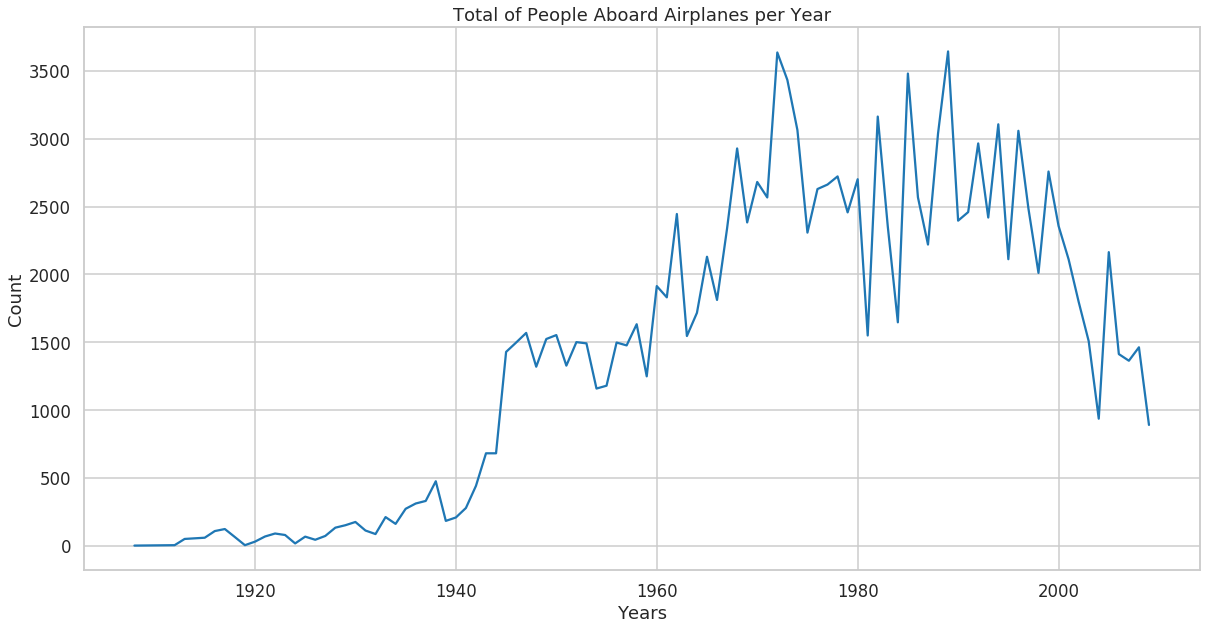

In [17]:
# plot
sns.lineplot(x = 'Year', y = 'Aboard', data = abrd_per_year)
plt.title('Total of People Aboard Airplanes per Year')
plt.xlabel('Years')
plt.ylabel('Count')

From the 40's, the number of people aboard airplanes starts to increase. From 1960 to 2000 is where we have most people aboard, the same years with most plane crashes and fatalities.

### 4.4 Fatalities vs Survived vs Killed on Ground

Now we visualize how the number of fatalities compare with the number of survived and those who were killed on the ground.

In [18]:
#summarise
FSG_per_year = data[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5,1,'Fatalities vs Survived vs Killed on Ground per Year')

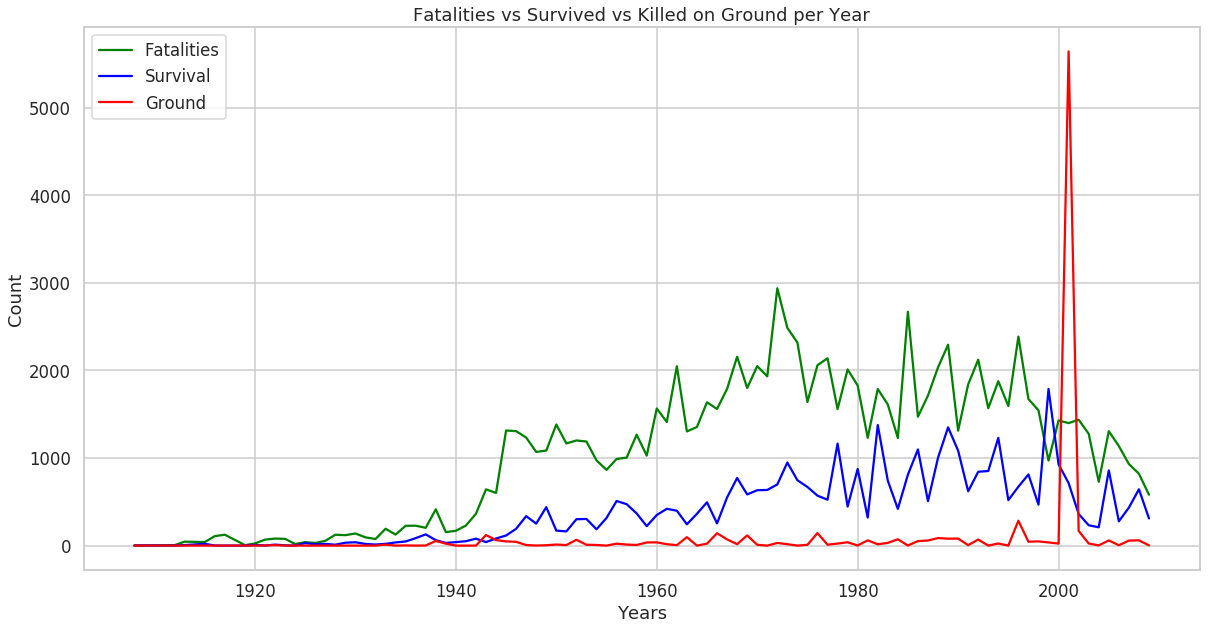

In [19]:
#plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year, color = 'green')
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year, color = 'blue')
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year, color = 'red')
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')

### 4.5 Worst operators and dangerous locations


In [20]:
oper_list = Counter(data['Operator']).most_common(10)
operators = []
crashes = []
for tpl in oper_list:
    if 'Military' not in tpl[0]:
        operators.append(tpl[0])
        crashes.append(tpl[1])
print('Top 10 the worst operators')
pd.DataFrame({'Count of crashes' : crashes}, index=operators)

Top 10 the worst operators


,Count of crashes
Aeroflot,179
Air France,70
Deutsche Lufthansa,65
China National Aviation Corporation,44
United Air Lines,44
Air Taxi,44
Pan American World Airways,41


In [21]:
loc_list = Counter(data['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
print('Top 10 the most dangerous locations')
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

Top 10 the most dangerous locations


,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


## 5. Text Clustering with K-Means

### 5.1 Importing needed modules

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 5.2 Data Preparation

In the 'Summary' column, we have NaN values as well, so we're going to create a new dataframe with the 'Summary' data and dropping all rows with NaN values.

In [23]:
text_data = data['Summary'].dropna()
text_data = pd.DataFrame(text_data)
# for reproducibility
random_state = 0 

KMeans normally works with numbers only: we need to have numbers.To get numbers, we do feature extraction.

The feature we’ll use is TF-IDF, a numerical statistic. This statistic uses term frequency and inverse document frequency.
The method TfidfVectorizer() implements the TF-IDF algorithm.

In [24]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

## 5.3 Model Fitting

And now we fit the model. For this analysis, we'll be using the KMeans algorithm with 5 clusters.

In [25]:
model = MiniBatchKMeans(n_clusters=5, random_state=random_state)
model.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

What are the cluster center vectors?

In [26]:
model.cluster_centers_

array([[3.32853808e-04, 5.61597890e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.52139182e-04, 9.42550033e-03, 8.27526103e-05, ...,
        2.97713352e-04, 2.25400527e-04, 0.00000000e+00],
       [0.00000000e+00, 8.77272673e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.34328619e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.41261664e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [27]:
# predict cluster labels for new dataset
model.predict(X)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
model.labels_

array([1, 1, 1, ..., 1, 2, 0], dtype=int32)

In [28]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
en
route
crashed
disappeared
mountain
plane
cargo
weather
flight
pilot


Cluster 1:
aircraft
approach
crashed
flight
pilot
weather
runway
mountain
conditions
struck


Cluster 2:
crashed
plane
taking
cargo
attempting
land
mountain
shortly
sea
fog


Cluster 3:
midair
collision
killed
aboard
dc
cessna
avoid
piper
air
mid


Cluster 4:
takeoff
engine
crashed
failure
shortly
plane
aircraft
lost
failed
runway


## 5.4 Visualization
To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfIdfVectorizer is quite large ( > 10,000), we need to reduce the dimension before we can plot. For this, we’ll ues PCA to transform our high dimensional features into 2 dimensions.

In [29]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

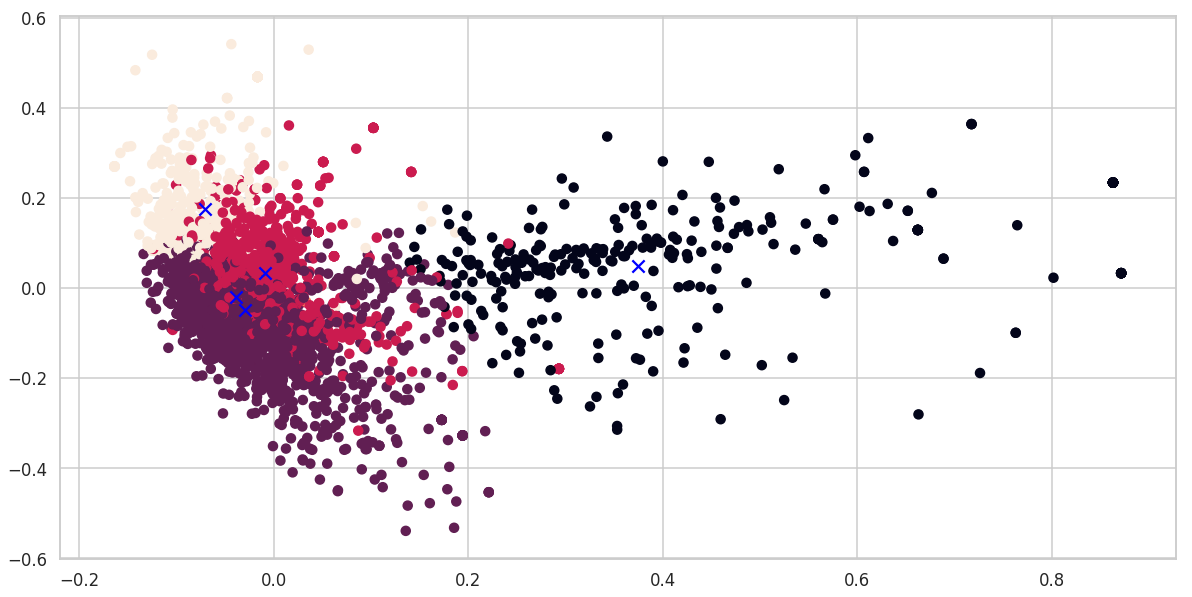

In [30]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## 5.5 Prediction

In [31]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["engine failure"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["terrorism"])
prediction = model.predict(Y)
print(prediction)
 



Prediction
[4]
[1]
